# 1. (30 puntos) Optimización de funciones

## Para las siguientes funciones:

<div style="text-align: justify; font-size:15px">
\begin{equation}
f_{1}(x,y)=xe^{(-x^{2}-y^{2})}
\end{equation}
</div>

## 1. Grafique tal función y distinga si las funciones son convexas o no, los puntos mínimos y regiones o puntos silla

In [26]:
import math
import random
import torch
import sympy.core
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sympy import diff, symbols, parse_expr, E, sympify, latex
from torch.autograd import grad
from IPython.display import display, Markdown
from enum import Enum
%matplotlib inline

In [27]:
def f(x, y):
    return x * math.e ** (-x**2 - y**2)

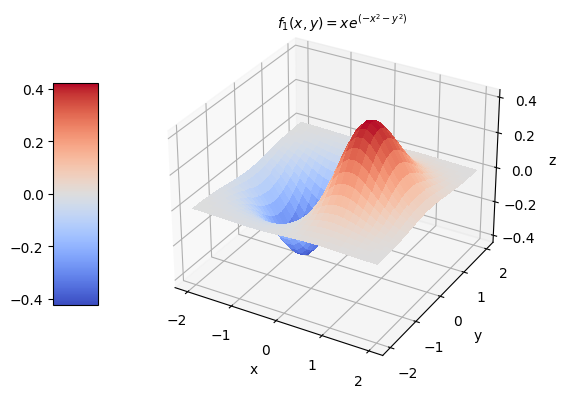

In [15]:
def plot_function():
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    plt.rcParams['legend.fontsize'] = 10
    linspace_x = torch.linspace(-2, 2, steps=30)
    linspace_y = torch.linspace(-2, 2, steps=30)
    X, Y = torch.meshgrid(linspace_x, linspace_y, indexing="xy")
    Z = f(X, Y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.text2D(0.35, 0.95, r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$', transform=ax.transAxes)
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.6, aspect=5, location='left')
    plt.show()

plot_function()

<div style="text-align: justify; font-size:15px">
    
- La función $f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$ es no convexa.
    
- El punto mínimo se encuentra en la región azul, su valor en Z es aproximadamente $-0.4$.
    
- El punto máximo se encuentra en la región roja, su valor en Z es aproximadamente $0.4$.
    
- Los puntos silla de la función se encuentran fuera del rango $x,y \in [-2,2]$
    

## 2. (10 puntos) Implemente el algoritmo del descenso del gradiente con moméntum:

In [34]:
#  Gradient descent with momentum implementation

def gradient_descent_momentum(initial_position, epochs=5, momentum=0.1, alpha=0.05, epsilon=0.2, convergence=-0.42):
    agent = initial_position
    agent.requires_grad = True
    agents = [agent]
    inertia = 0
    message = ""
    for epoch in range(epochs):  #  range(epochs)
        print("---------epoch-" + str(epoch) + "-------------\n")
        print(f"Agent: {agent}\n")
        function_eval = f(agent[:1], agent[1:])
        gradient = grad(function_eval, agent, create_graph=True)[0]
        agent = agent - ((momentum * inertia) + alpha * gradient)
        theta = agent.detach()
        agents.append(theta)
        inertia = (momentum * inertia) + alpha * (1 - momentum) * gradient
        print(f"Gradient: {gradient}")
        print(f"New agent: {theta}")
        print(f"Inertia: {inertia}\n")
        if f(theta[:1], theta[1:]) <= convergence:
            message = "Convergence reached !"
            break
        if torch.norm(gradient) < epsilon:
            message = "Tolerance reached !"
            break
    print(message)
    agents[0] = agents[0].detach()
    return agents, message

In [28]:
# Code to generate the plot

def plot(thetas, title):
    #  Contour plot
    linspace_x = torch.linspace(-2, 2, steps=30)
    linspace_y = torch.linspace(-2, 2, steps=30)
    X, Y = torch.meshgrid(linspace_x, linspace_y, indexing="xy")
    Z = f(X, Y)
    fig = plt.figure(figsize=plt.figaspect(0.4))
    ax = fig.add_subplot(1, 2, 1)
    cp = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
    fig.colorbar(cp)  # Add a color bar to a plot
    ax.set_title(r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    thetas = torch.stack(thetas)
    agents_x = thetas[:, 0]
    agents_y = thetas[:, 1]
    ax.scatter(agents_x, agents_y, s=40, lw=0, color='yellow', label=r'HELLO')
    plt.quiver(agents_x[:-1], agents_y[:-1], agents_x[1:]-agents_x[:-1], agents_y[1:]-agents_y[:-1], scale_units='xy',
               angles='xy', scale=1)

    #  3D plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    agents_z = f(agents_x, agents_y)
    ax.scatter(agents_x, agents_y, agents_z, s=80, lw=0, color='yellow', alpha=1)
    ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, cmap=cm.coolwarm, edgecolor='none', alpha=0.4)
    ax.view_init(50, 100)
    ax.text2D(0.35, 0.95, r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$', transform=ax.transAxes)
    ax.quiver(agents_x[:-1], agents_y[:-1], agents_z[:-1], (agents_x[1:]-agents_x[:-1]), (agents_y[1:]-agents_y[:-1]),
              (agents_z[1:]-agents_z[:-1]), length=1, alpha=1)
    plt.show()

    #  Results
    thetas_list = "" 
    for theta in range(len(thetas)):
        thetas_list += "epoch " + str(theta) + ": $\\theta_{" + str(theta) + "}=" + str(round(thetas[theta][0].item(), 3)) + "," + \
                       str(round(thetas[theta][1].item(), 3)) + "$ \n"
    minimums = ""
    for minimum in range(len(agents_z)):
        minimums += "$f(\\theta_{" + str(minimum) + "})=" + str(round(agents_z[minimum].item(), 3)) + "$ \n"

    plt.figure(figsize=(1, 0.1))
    plt.text(0.2, 1, title, ha='center', va='baseline', size=12)
    plt.axis('off')
    plt.show()
    plt.figure(figsize=(6, 0.1))
    plt.text(0, 1, thetas_list, ha='left', va='baseline', size=12)
    plt.text(1, 1, minimums, ha='left', va='baseline', size=12)
    plt.axis('off')
    plt.show()

<div style="text-align: justify; font-size:15px">

a) Escoja un coeficiente de aprendizaje $\alpha$ que permita la convergencia y reporte los resultados para 10 corridas:

1) La tolerancia fijada para la convergencia en términos de la magnitud del gradiente.

2) La cantidad de iteraciones necesarias para converger.

3) El punto de convergencia.

4) Escoga una de las corridas y en una gráfica muestre los puntos probados (visitados) por el algoritmo.

</div>

In [50]:
#  %%capture
#  Uncomment previous line to disable prints

#  GDM Execution
alpha = 0.25 # Learning rate alpha
gamma = 0.5 # Momentum coefficient
epsilon = 0.11  # Tolerance epsilon
convergence = -0.42 # Convergence point
epochs = 20 # Iteration epochs
runs = 10 # Runs
results = [] # Gradient descent results

for run in range(runs):
    print("\n----------------------")
    print(f"Run #{run + 1}\n")
    point_x = random.uniform(-1, 1)
    point_y = random.uniform(-1, 1)
    init_position = torch.Tensor([point_x, point_y])
    thetas, message = gradient_descent_momentum(init_position, epochs=epochs, alpha=alpha, momentum=gamma,
                                                epsilon=epsilon, convergence=convergence)
    results.append((thetas, message))

#  Randomly choose a run and plot
run = random.randint(0, runs - 1)

#  Example execution:
#  init_position = torch.Tensor([0.6, -0.1])
#  thetas, message = gradient_descent_momentum(init_position, epochs=epochs, alpha=alpha, momentum=0, epsilon=epsilon, convergence=convergence)
#  title = "GDM with: $\\alpha=" + str(alpha) + ", \\gamma=" + str(gamma) + ", \\epsilon=" + str(epsilon) + "$" + ", convergence=$" + str(convergence) + "$" + \
#        ", Stopped due to: " + message


----------------------
Run #1

---------epoch-0-------------

Agent: tensor([ 0.5197, -0.3662], requires_grad=True)

Gradient: tensor([0.3069, 0.2541], grad_fn=<AddBackward0>)
New agent: tensor([ 0.4430, -0.4297])
Inertia: tensor([0.0384, 0.0318], grad_fn=<AddBackward0>)

---------epoch-1-------------

Agent: tensor([ 0.4430, -0.4297], grad_fn=<SubBackward0>)

Gradient: tensor([0.4150, 0.2601], grad_fn=<AddBackward0>)
New agent: tensor([ 0.3201, -0.5106])
Inertia: tensor([0.0711, 0.0484], grad_fn=<AddBackward0>)

---------epoch-2-------------

Agent: tensor([ 0.3201, -0.5106], grad_fn=<SubBackward0>)

Gradient: tensor([0.5530, 0.2273], grad_fn=<AddBackward0>)
New agent: tensor([ 0.1463, -0.5916])
Inertia: tensor([0.1047, 0.0526], grad_fn=<AddBackward0>)

---------epoch-3-------------

Agent: tensor([ 0.1463, -0.5916], grad_fn=<SubBackward0>)

Gradient: tensor([0.6602, 0.1194], grad_fn=<AddBackward0>)
New agent: tensor([-0.0711, -0.6478])
Inertia: tensor([0.1349, 0.0412], grad_fn=<AddB

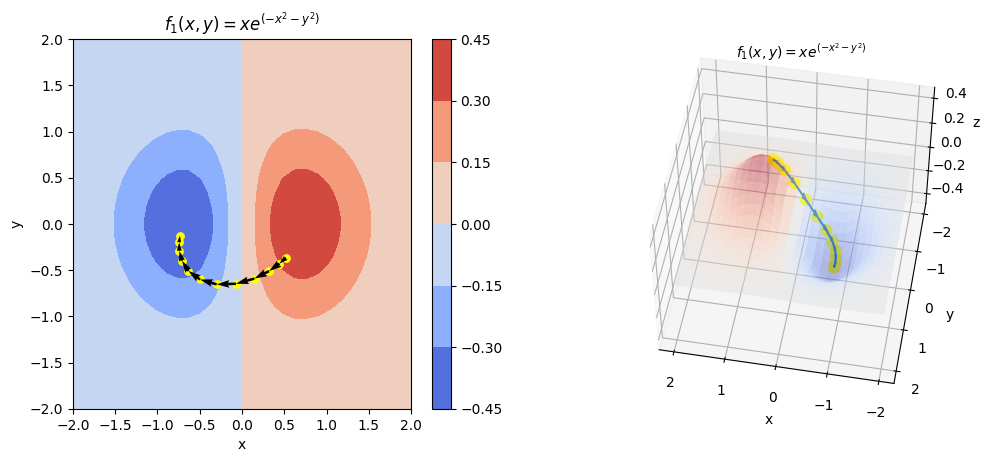

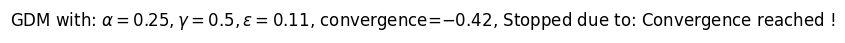

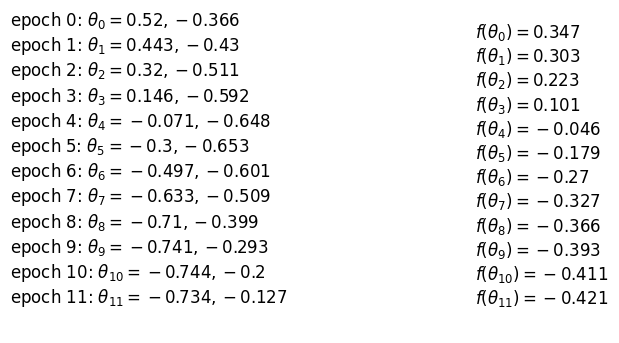

In [52]:
#  Plot separated so that console prints are not shown alongside !!
thetas, message = results[run]
title = "GDM with: $\\alpha=" + str(alpha) + ", \\gamma=" + str(gamma) + ", \\epsilon=" + str(epsilon) + "$" +\
        ", convergence=$" + str(convergence) + "$" + ", Stopped due to: " + message
plot(thetas, title)

<div style="text-align: justify; font-size:15px">
b) Escoja un $\alpha$ relativamente grande respecto al valor seleccionado. ¿Qué sucede? ¿Permite un $\alpha$ muy grande la convergencia? <br>

Para esta superficie, con los parámetros default programados y un punto inicial cercano a los rangos en $Y = [0.5, -0.5]$ y en $X = [-1.0, 0.5]$, el algoritmo permite un $\alpha$ muy grande. Al probar con varios valores de $\alpha$, se llegó a que un $\alpha$ de $1.2$ es lo suficientemente grande para una ejecución estable respetando los rangos y los otros parámetros anteriormente mencionados. En el ejemplo abajo se puede observar una ejecución con un valor de $\alpha=1.2$.
Con un $\alpha$ elevado, el algoritmo llega más rápido al mínimo, sin embargo, corre el riesgo de avanzar de más y omitir el mínimo dependiendo de los otros parámetros del algoritmo y el punto inicial.
En este caso, se permite un $\alpha$ grande para la convergencia, se llega mucho más rápido al punto de convergencia default, sin importar donde se ubique el punto inicial según los parámetros y los rangos indicados anteriormente.

c) ¿Qué sucede si escoge un $\alpha$ muy pequeño?

Para esta superficie con un $\alpha$ pequeño, al compararlo con un alpha grande, se llega al mínimo en una cantidad mayor de epochs. Véase por ejemplo una ejecución con un $\alpha$ de $0.05$, punto inicial $x=0.5, y=-0.23$ y otros parámetros default, fue necesario 32 epochs para llegar a un mínimo de $-0.42$, en cambio con un $\alpha$ de $0.8$ se llegó a un mínimo de $-0.428$ en 5 epochs. A pesar de esto, al usar un $\alpha$ pequeño, se sigue una ruta más segura hacia el mínimo en lugar de un $\alpha$ grande que lo puede llegar a omitir.


d) ¿Cómo puede el algoritmo de descenso de gradiente evitar quedar atrapado en mínimos locales o puntos silla?

Se puede utilizar un coeficiente de momentum grande, puede ser que llegue cerca de un mínimo local o punto silla pero el momentum lo saca de ahí y lo hace buscar otros mínimos menores en donde no se quede atascado. Del mismo modo, también depende en donde se encuentre el punto inicial, por ejemplo, con esta superficie, si el mismo se encuentra en una posición $x > 1.2$ nunca llegará al mínimo sin importar los valores de los otros parámetros.

---------epoch-0-------------

Agent: tensor([0.5000, 0.5000], requires_grad=True)

Gradient: tensor([ 0.3033, -0.3033], grad_fn=<AddBackward0>)
New agent: tensor([0.1361, 0.8639])
Inertia: tensor([ 0.3275, -0.3275], grad_fn=<AddBackward0>)

---------epoch-1-------------

Agent: tensor([0.1361, 0.8639], grad_fn=<SubBackward0>)

Gradient: tensor([ 0.4482, -0.1094], grad_fn=<AddBackward0>)
New agent: tensor([-0.4345,  1.0280])
Inertia: tensor([ 0.5168, -0.1509], grad_fn=<AddBackward0>)

---------epoch-2-------------

Agent: tensor([-0.4345,  1.0280], grad_fn=<SubBackward0>)

Gradient: tensor([0.1792, 0.2571], grad_fn=<AddBackward0>)
New agent: tensor([-0.7011,  0.7346])
Inertia: tensor([0.2452, 0.2625], grad_fn=<AddBackward0>)

---------epoch-3-------------

Agent: tensor([-0.7011,  0.7346], grad_fn=<SubBackward0>)

Gradient: tensor([0.0060, 0.3673], grad_fn=<AddBackward0>)
New agent: tensor([-0.7329,  0.2676])
Inertia: tensor([0.0310, 0.4229], grad_fn=<AddBackward0>)

---------epoch-4--

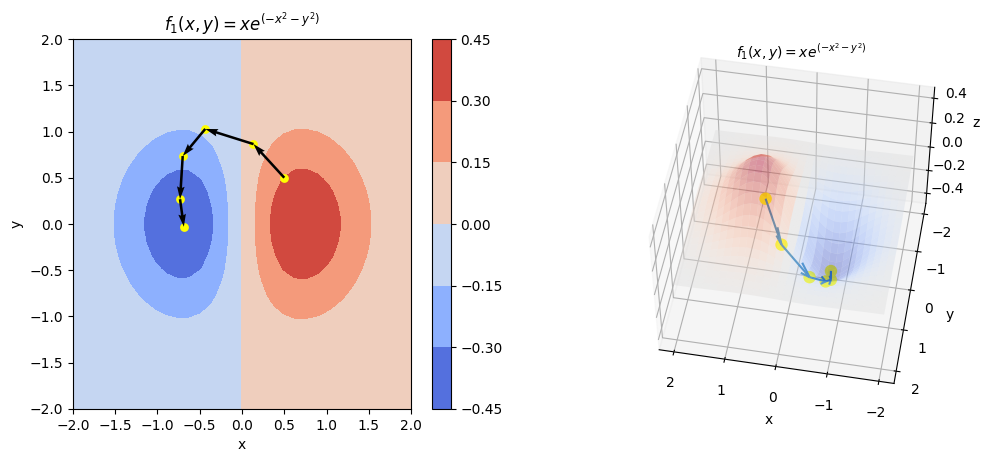

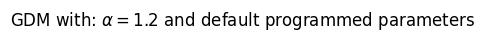

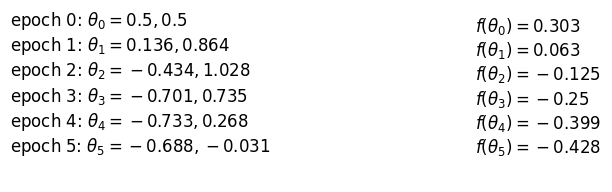

In [39]:
#  Point B
alpha = 1.2
init_position = torch.Tensor([0.5, 0.5])
thetas, message = gradient_descent_momentum(init_position, alpha=alpha)
title = "GDM with: $\\alpha=" + str(alpha) + "$ and default programmed parameters"
plot(thetas, title)

## 3. (20 puntos) Implemente el algoritmo de Newton-Raphson:

In [29]:
# Code to generate the visual construction of the hessian matrix of any function.
# This is used for visual purposes only !!

def visual_function(expression: str = ""):
    if not expression:
        x = symbols('x')
        y = symbols('y')
        return x * E ** (-x**2 - y**2)
    return parse_expr(expression)


def visual_hessian_matrix(expression: sympy.core.Expr, variables: list = None):
    if variables is None:
        variables = ["x", "y"]
    hess_matrix = np.empty((len(variables), len(variables)), dtype=sympy.core.Expr)
    matrix_col_row = 0
    derivatives = []
    for variable in variables:
        print("Building column #" + str(matrix_col_row + 1) + " and row #" + str(matrix_col_row + 1))
        first_derivative = sympify(diff(expression, variable))
        der = "df/d" + variable + "=" + str(first_derivative)
        derivatives.append(der)
        print(der)
        variable_index = variables.index(variable)
        column = []
        for second_variable in variables[variable_index:]:
            second_derivative = sympify(diff(first_derivative, second_variable))
            der = "df/d" + second_variable + "d" + variable + "=" + str(second_derivative)
            derivatives.append(der)
            print(der)
            column.append(second_derivative)
        hess_matrix[matrix_col_row:, matrix_col_row] = column
        row = []
        for second_variable in variables[variable_index+1:]:
            derivative_second_var = sympify(diff(expression, second_variable))
            der = "df/d" + second_variable + "=" + str(derivative_second_var)
            derivatives.append(der)
            print(der)
            second_derivative = sympify(diff(derivative_second_var, variable))
            der = "df/d" + variable + "d" + second_variable + "=" + str(second_derivative)
            derivatives.append(der)
            print(der)
            row.append(second_derivative)
        hess_matrix[matrix_col_row, matrix_col_row + 1:] = row
        matrix_col_row += 1
    return hess_matrix, derivatives


def derivatives_to_latex(derivatives):
    latex_derivatives = []
    for der in derivatives:
        start = "$" + der[0: der.find("=")]
        func = sympify(der[der.find("=") + 1:])
        latex_derivative = start + "=" + latex(func) + "$\n"
        latex_derivatives.append(latex_derivative)
    return latex_derivatives


def matrix_to_latex(matrix):
    latex_matrix = r'$H=\begin{pmatrix}'
    for row in matrix:
        element_latex = ""
        for element in row:
            element_latex += latex(element) + " & "
        element_latex = element_latex[:len(element_latex) - 3] + r'\\'
        latex_matrix += element_latex
    latex_matrix += r'\end{pmatrix}$'
    return latex_matrix


def step_by_step_hessian():
    h_matrix, all_derivatives = visual_hessian_matrix(visual_function())
    all_derivatives = derivatives_to_latex(all_derivatives)
    latex_h_matrix = matrix_to_latex(h_matrix)
    print(f"Hessian Matrix: {h_matrix}" + "\n")
    print(f"Hessian Matrix in Latex: {latex_h_matrix}\n")
    return latex_h_matrix, all_derivatives

In [30]:
# Newton-Raphson implementation

def hessian_matrix(gradient, agent, visualize=True):
    if visualize:
        print(f"First Derivative: {gradient}")
    dimensions = agent.shape[0]
    hess_matrix = torch.zeros(dimensions, dimensions)
    for dimension in range(dimensions):
        second_derivative = grad(gradient[dimension], agent, create_graph=True)[0]
        if visualize:
            print(f"Second derivative on dimension {dimension}: {second_derivative}")
        hess_matrix[dimension:] = second_derivative
    if visualize:
        print(f"Hessian Matrix: {hess_matrix}\n")
    return hess_matrix


class Point(Enum):
    LOCAL_MIN = "local minimum"
    LOCAL_MAX = "local maximum"
    SADDLE_POINT = "saddle point"
    NO_CONCLUSION = "no conclusion"


def point_status_by_determinant(hess_matrix):
    determinant = hess_matrix[0][0] * hess_matrix[1][1] - hess_matrix[0][1]**2
    if determinant > 0 and hess_matrix[0][0] > 0:
        return Point.LOCAL_MIN
    if determinant > 0 and hess_matrix[0][0] < 0:
        return Point.LOCAL_MAX
    if determinant < 0:
        return Point.SADDLE_POINT
    return Point.NO_CONCLUSION


def newton_raphson(initial_position, function, epochs=5, damping_factor=0.4, convergence=-0.42, epsilon=0.2,
                   run_with_fix=True, stop_at_saddle=False):
    agent = initial_position
    agent.requires_grad = True
    agents = [agent]
    latex_h_matrix, all_derivatives = step_by_step_hessian()
    exit_message = ""
    for epoch in range(epochs):
        print("---------epoch-" + str(epoch) + "-------------\n")
        print(f"Agent: {agent}\n")
        function_eval = function(agent[:1], agent[1:])
        gradient = grad(function_eval, agent, create_graph=True)[0]
        hess_matrix = hessian_matrix(gradient, agent)
        point_by_determinant = point_status_by_determinant(hess_matrix)
        print(f"The point ({round(agent[:1].item(), 3)}, {round(agent[1:].item(), 3)}) is: {point_by_determinant.value}\n")
        if (stop_at_saddle and point_by_determinant == Point.SADDLE_POINT) or point_by_determinant == Point.NO_CONCLUSION:
            exit_message = "Saddle point found ! Stopping..." if point_by_determinant == Point.SADDLE_POINT else \
                "Stopped due to non conclusive point !"
            break
        inverse_hess_matrix = torch.nan_to_num(torch.inverse(hess_matrix))
        hess_gradient = torch.mm(inverse_hess_matrix, gradient.view(gradient.shape[0], 1))
        new_agent = agent.view(agent.shape[0], 1) - damping_factor * hess_gradient
        new_agent = new_agent.view(agent.shape[0])
        if function(new_agent[:1], new_agent[1:]) > function_eval and run_with_fix:  # This is the fix !!
            # If it goes up then force it to go down
            agent = agent.view(agent.shape[0], 1) - damping_factor * torch.abs(hess_gradient)
            agent = agent.view(agent.shape[0])
        else:
            agent = new_agent
        new_agent_status = point_status_by_determinant(hessian_matrix(grad(function(agent[:1], agent[1:]), agent, 
                                                                           create_graph=True)[0], agent, visualize=False))
        theta = agent.detach()
        agents.append(theta)
        print(f"Inverse Hessian Matrix: {inverse_hess_matrix}\n")
        print(f"Gradient: {hess_gradient}")
        print(f"New agent: {theta}")
        print(f"The new agent is a: {new_agent_status.value}\n")
        if new_agent_status.value == Point.NO_CONCLUSION:
            exit_message = "Stopped due to non conclusive point !"
            break
        if f(theta[:1], theta[1:]) <= convergence:
            exit_message = "Convergence reached ! "
            break
        if torch.norm(gradient) < epsilon:
            exit_message = "Tolerance reached !"
            break
    print(exit_message)
    agents[0] = agents[0].detach()
    return agents, latex_h_matrix, all_derivatives, exit_message

<div style="text-align: justify; font-size:15px">
Se realizó un ajuste para forzar la búsqueda del mínimo en caso de que se busque el máximo, el mismo se encuentra en la línea 59 de arriba. Este ajuste funciona mejor para posiciones de $x$ y $y$ positivas, por ejemplo $[0.5, 0.2]$. También se implementó el "Damping Factor" que es una especie de learning rate para que el punto no se mueva muy largo.

En la generación de las 10 corridas, se colocaron los valores de los puntos iniciales en $x = [-1, 1], y = [-0.2, 0.2]$, ya que, en esos rangos, el algoritmo funciona mejor y no tiende a "dispararse" tanto. Los mismos valores fueron seleccionados después de muchas pruebas.

Solo para fines demostrativos, se implementó una funcionalidad utilizando sympy para desplegar la construcción de la matriz Hessiana paso a paso, también funciona para otras funciones multivariables, no solo la que se utiliza en el ejercicio.
</div>

<div style="text-align: justify; font-size:15px">

B) Reporte los resultados para 10 corridas:

1) La tolerancia fijada para la convergencia en términos de la magnitud del gradiente.

2) La cantidad de iteraciones necesarias para converger.

3) El punto de convergencia.

4) Escoga una de las corridas y en una gráfica muestre los puntos probados (visitados) por el algoritmo.

</div>

In [35]:
#  %%capture
#  Uncomment previous line disable prints
#  Newton-Raphson execution

convergence = -0.43 # Convergence point
damping_factor = 1  # Similar to learning rate - To deactivate set to 1
epsilon = 0.2 # Tolerance epsilon
epochs = 6 # Iteration epochs
run_with_fix = False # Execute with the manual fix
stop_at_saddle = False # Stop when saddle point is found
results = [] # Newton-Raphson results
runs = 10

#  Running with recommended ranges for initial points x = [-1, 1] y = [-0.2, 0.2]
for run in range(runs):
    print("\n----------------------")
    print(f"Run #{run + 1}\n")
    point_x = random.uniform(-1, 1)
    point_y = random.uniform(-0.2, 0.2)
    init_position = torch.Tensor([point_x, point_y])
    thetas, latex_hess_matrix, visual_derivatives, exit_message = newton_raphson(init_position, f, convergence=convergence, 
                                                                                 damping_factor=damping_factor,
                                                                                 epsilon=epsilon, epochs=epochs, 
                                                                                 run_with_fix=run_with_fix,
                                                                                 stop_at_saddle=stop_at_saddle)
    results.append((thetas, latex_hess_matrix, visual_derivatives, exit_message))

#  Randomly choose a run and plot
run = random.randint(0, runs - 1)

#  Example execution with fix and damping factor:
#  init_position = torch.Tensor([0.5, 0.2])
#  thetas, latex_hess_matrix, visual_derivatives, exit_message = newton_raphson(init_position, f, convergence=convergence, damping_factor=0.6, epsilon=epsilon, epochs=epochs, run_with_fix=True, stop_at_saddle=stop_at_saddle)
#  title = "Newton-Raphson with: damping factor=$" + "0.6" + ", \\epsilon=" + str(epsilon) + \
#          "$, convergence=$" + str(convergence) + "$, run with fix=" + "True" + ", stopped due to: " + exit_message



----------------------
Run #1

Building column #1 and row #1
df/dx=-2*x**2*exp(-x**2 - y**2) + exp(-x**2 - y**2)
df/dxdx=4*x**3*exp(-x**2 - y**2) - 6*x*exp(-x**2 - y**2)
df/dydx=4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)
df/dy=-2*x*y*exp(-x**2 - y**2)
df/dxdy=4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)
Building column #2 and row #2
df/dy=-2*x*y*exp(-x**2 - y**2)
df/dydy=4*x*y**2*exp(-x**2 - y**2) - 2*x*exp(-x**2 - y**2)
Hessian Matrix: [[4*x**3*exp(-x**2 - y**2) - 6*x*exp(-x**2 - y**2)
  4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)]
 [4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)
  4*x*y**2*exp(-x**2 - y**2) - 2*x*exp(-x**2 - y**2)]]

Hessian Matrix in Latex: $H=\begin{pmatrix}4 x^{3} e^{- x^{2} - y^{2}} - 6 x e^{- x^{2} - y^{2}} & 4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}}\\4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}} & 4 x y^{2} e^{- x^{2} - y^{2}} - 2 x e^{- x^{2} - y^{2}}\\\end{pmatrix}$

---------epoch-0-------------

Agent: tenso

Agent: tensor([-0.8272,  0.0287], requires_grad=True)

First Derivative: tensor([-0.1858,  0.0239], grad_fn=<AddBackward0>)
Second derivative on dimension 0: tensor([1.3604, 0.0107], grad_fn=<AddBackward0>)
Second derivative on dimension 1: tensor([0.0107, 0.8325], grad_fn=<AddBackward0>)
Hessian Matrix: tensor([[1.3604, 0.0107],
        [0.0107, 0.8325]], grad_fn=<CopySlices>)

The point (-0.827, 0.029) is: local minimum

Inverse Hessian Matrix: tensor([[ 0.7351, -0.0094],
        [-0.0094,  1.2013]], grad_fn=<NanToNumBackward0>)

Gradient: tensor([[-0.1368],
        [ 0.0305]], grad_fn=<MmBackward0>)
New agent: tensor([-0.6904, -0.0018])
The new agent is a: local minimum

Tolerance reached !

----------------------
Run #6

Building column #1 and row #1
df/dx=-2*x**2*exp(-x**2 - y**2) + exp(-x**2 - y**2)
df/dxdx=4*x**3*exp(-x**2 - y**2) - 6*x*exp(-x**2 - y**2)
df/dydx=4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)
df/dy=-2*x*y*exp(-x**2 - y**2)
df/dxdy=4*x**2*y*exp(-x**2 - y**2) -

Agent: tensor([-0.4339,  0.1135], requires_grad=True)

First Derivative: tensor([0.5098, 0.0805], grad_fn=<AddBackward0>)
Second derivative on dimension 0: tensor([ 1.8618, -0.1157], grad_fn=<AddBackward0>)
Second derivative on dimension 1: tensor([-0.1157,  0.6914], grad_fn=<AddBackward0>)
Hessian Matrix: tensor([[ 1.8618, -0.1157],
        [-0.1157,  0.6914]], grad_fn=<CopySlices>)

The point (-0.434, 0.113) is: local minimum

Inverse Hessian Matrix: tensor([[0.5427, 0.0908],
        [0.0908, 1.4615]], grad_fn=<NanToNumBackward0>)

Gradient: tensor([[0.2840],
        [0.1640]], grad_fn=<MmBackward0>)
New agent: tensor([-0.7179, -0.0505])
The new agent is a: local minimum

---------epoch-1-------------

Agent: tensor([-0.7179, -0.0505], grad_fn=<ViewBackward0>)

First Derivative: tensor([-0.0184, -0.0432], grad_fn=<AddBackward0>)
Second derivative on dimension 0: tensor([ 1.6843, -0.0019], grad_fn=<AddBackward0>)
Second derivative on dimension 1: tensor([-0.0019,  0.8510], grad_fn=<Ad

Hessian Matrix construction: 

$df/dx=- 2 x^{2} e^{- x^{2} - y^{2}} + e^{- x^{2} - y^{2}}$


$df/dxdx=4 x^{3} e^{- x^{2} - y^{2}} - 6 x e^{- x^{2} - y^{2}}$


$df/dydx=4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}}$


$df/dy=- 2 x y e^{- x^{2} - y^{2}}$


$df/dxdy=4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}}$


$df/dy=- 2 x y e^{- x^{2} - y^{2}}$


$df/dydy=4 x y^{2} e^{- x^{2} - y^{2}} - 2 x e^{- x^{2} - y^{2}}$


$H=\begin{pmatrix}4 x^{3} e^{- x^{2} - y^{2}} - 6 x e^{- x^{2} - y^{2}} & 4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}}\\4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}} & 4 x y^{2} e^{- x^{2} - y^{2}} - 2 x e^{- x^{2} - y^{2}}\\\end{pmatrix}$

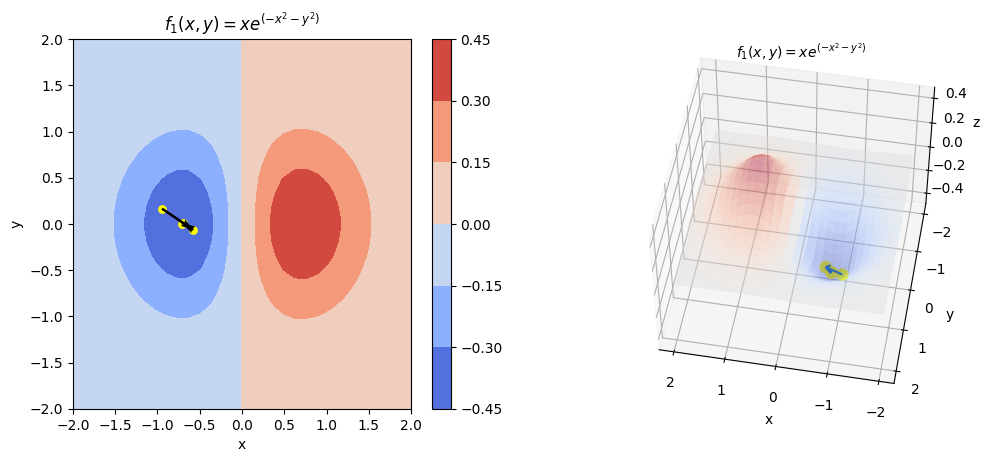

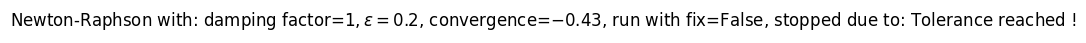

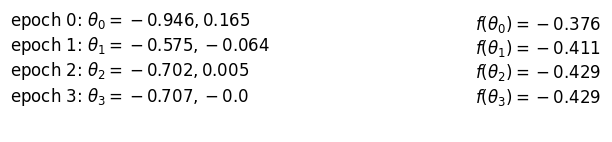

In [36]:
# Plot separated so that console prints are not shown alongside !!

#  Comment if using example execution
thetas, latex_hess_matrix, visual_derivatives, exit_message = results[run]

# Visualization of Hessian Matrix - Rerun if not being shown !!!!
display(Markdown("Hessian Matrix construction: "))
for visual_derivative in visual_derivatives:
    display(Markdown(visual_derivative))
display(Markdown(latex_hess_matrix))

# Plot Newton-Raphson

#  Comment if using example execution
title = "Newton-Raphson with: damping factor=$" + str(damping_factor) + ", \\epsilon=" + str(epsilon) + \
        "$, convergence=$" + str(convergence) + "$, run with fix=" + str(run_with_fix) + ", stopped due to: " + exit_message
plot(thetas, title)

##  4. Investigue y reporte las principales ventajas y desventajas, usando los resultados obtenidos, del algoritmo Newton Raphson respecto al algoritmo del descenso del gradiente con moméntum, citando adecuadamente las referencias.
   
<br>

<div style="text-align: justify; font-size:15px">    

Una gran desventaja del algoritmo de Newton-Raphson es que presenta una mayor tendencia a divergir, esto sucede cuando la matriz Hessiana no es positiva definitiva, osea que todos sus valores sean positivos [1]. A pesar de eso, en algunos casos se puede continuar calculando el punto óptimo estimado y se puede modificar la dirección para asegurar el descenso, sin embargo, Fletcher [2] menciona que el punto estacionario de la función cuadrática de aproximación (la aproximación de Taylor) no es un punto de minimización y la relevancia de buscar en esa dirección es cuestionable; también alude que el método básico de Newton, tal como está, no es adecuado para un algoritmo de propósito general, ya que la Hessiana puede no ser positiva definitiva cuando $x(t)$ está lejos de la solución.


Lo mencionado anteriormente fue evidente en los experimentos, especialmente aquellos donde la posición inicial estaba fuera de los rangos $x = [-1, 1], y = [-0.2, 0.2]$, por eso, en el arreglo que se implementó al algoritmo, cuando detectamos que el nuevo punto es mayor al de la iteración anterior, modificamos la Hessiana para que sea positiva definitiva, con esto se le dá mejor dirección al algoritmo.

Otra desventaja del Newton-Raphson es el costo computacional para calcular la Hessiana, menciona LeCun et al. [1] que, uno de los principales inconvenientes es que se debe almacenar e invertir una matriz $NxN$ Hessiana, lo que requiere $O(N^3)$ iteraciones.


Una ventaja del algoritmo de descenso del gradiente con momentum, además no presentar las desventajas mencionadas anteriormente, como menciona LeCun et al. [1], puede aumentar la velocidad cuando la superficie de costo es altamente no esférica porque amortigua el tamaño de los pasos a lo largo de las direcciones de alta curvatura, lo que produce una mayor tasa de aprendizaje efectiva a lo largo de las direcciones de baja curvatura. En los experimentos realizados, esto resulta ser cierto pero depende mucho del coeficiente del momentum y del learning rate, ya que hemos visto instancias que con o sin momentum se llega a la convergencia en la misma cantidad de epochs.

Referencias:


[1] Y. LeCun, L. Bottou, G. B. Orr, and K. Müller, “Efficient backprop”, Lecture Notes in Computer Science, pp. 9–50, 1998. DOI: 10.1007/3-540-49430-8 2.

[2] R. Fletcher, “Newton-like methods”, in Practical methods of optimization. 2nd edition. John Wiley amp; Sons, 1987.

</div>